In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset,random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

In [16]:

BATCH_SIZE = 64
NUM_CLASSES = 2
LEARNING_RATE = 0.001
EPOCHS_NUM = 10

In [17]:
device = torch.device('cpu')
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # Normalize
])

In [18]:
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

dataset = ImageFolder(root='./validation_dataset', transform=augmentation_transforms)

train_size = int(0.85 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

test_dataset.dataset.transform = test_transforms 


train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Classes: {dataset.classes}")
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Classes: ['not skin', 'skin']
Total samples: 15140
Training samples: 12869
Testing samples: 2271


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3592544..2.5574567].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8506975..2.3607883].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.390296..2.6756902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2412531..2.2039294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..0.41249645].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1496612..2.4220564].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.182372


Displaying first 10 samples from Training Dataset:


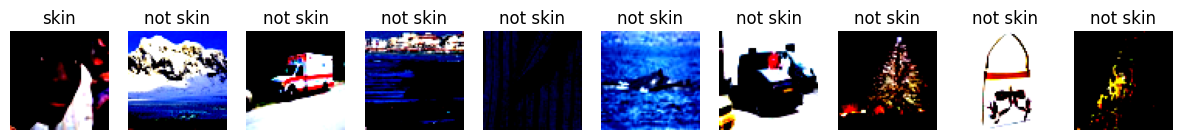

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2412531..2.2426991].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.3396237].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.280587..1.9325405].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.142919..2.7537313].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.692439..2.734221].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9855843..2.7537313].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2


Displaying first 10 samples from Testing Dataset:


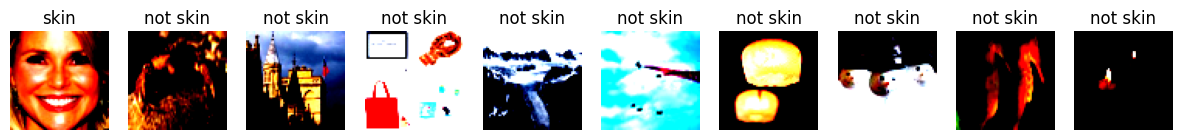

In [19]:
import matplotlib.pyplot as plt

print("\nDisplaying first 10 samples from Training Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = train_dataset[i]
    class_name = train_dataset.dataset.classes[label]
    
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy()) 
    plt.title(class_name)
    plt.axis('off')  # Hide axes

plt.show() 

print("\nDisplaying first 10 samples from Testing Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = test_dataset[i] 
    class_name = test_dataset.dataset.classes[label]
    
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.title(class_name)
    plt.axis('off')

plt.show()

In [20]:
from NN_class import ConvNeuralNet

In [21]:
model = ConvNeuralNet(NUM_CLASSES)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [22]:
for epoch in range(EPOCHS_NUM):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, EPOCHS_NUM, loss.item()))

Epoch [1/10], Loss: 0.0948
Epoch [2/10], Loss: 0.1184
Epoch [3/10], Loss: 0.6922
Epoch [4/10], Loss: 0.0001
Epoch [5/10], Loss: 0.1072
Epoch [6/10], Loss: 0.0004
Epoch [7/10], Loss: 0.0766
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0020
Epoch [10/10], Loss: 0.0014


In [23]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(dataset), 100 * correct / total))

Accuracy of the network on the 15140 train images: 99.41720413396534 %


In [24]:
torch.save(model.state_dict(), "model.pth")
print("Model saved as 'model.pth'")

Model saved as 'model.pth'


In [25]:
model = ConvNeuralNet(num_classes=2)
model.load_state_dict(torch.load("model.pth"))
model.eval()

C:\Users\User\AppData\Local\Temp\ipykernel_30980\3982186791.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


ConvNeuralNet(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)